In [30]:
#importing all required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

In this Udacity Data Scientist project I want to understand the underlying factors behind a video game's success. As an avid gamer myself, I thought it would make an interesting project and as such I will aim to answer three questions

Q1: Which genres perform the most?

Q2: Which Platform is being used by the most by the users, PS4 or Xbox?

Q3/Q4: How does a games platform, Genre, critic score, user score, and Rating influence sales. Can we predict
Sales using these attributes?

In [31]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [32]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [33]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         7590 non-null float64
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [35]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [36]:
df.dropna(axis = 0, inplace = True)

In [37]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [38]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [39]:
df = df[(df['Platform'] == 'PS4') | (df['Platform'] == 'XOne')]

### Above I aim to limit my analysis to the 2 most popular platforms, Playstation and Xbox

In [40]:
df.drop(['Name', 'Publisher', 'Developer'], inplace = True, axis = 1)

C:\Users\SamuelMartin\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Dropping unnecessary columns 

In [41]:
df[['Platform', 'Genre', 'Rating']] = df[['Platform', 'Genre', 'Rating']].astype('category')
df.dtypes

C:\Users\SamuelMartin\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Platform           category
Year_of_Release     float64
Genre              category
NA_Sales            float64
EU_Sales            float64
JP_Sales            float64
Other_Sales         float64
Global_Sales        float64
Critic_Score        float64
Critic_Count        float64
User_Score          float64
User_Count          float64
Rating             category
dtype: object

### Converting categorical data into categories

Taking a look at the correlation between variables. As we can see, critic scores, critic counts, an obviously user counts have positive correlations with sales

In [42]:
df['Platform_cat'] = df['Platform'].cat.codes
df['Genre_cat'] = df['Genre'].cat.codes
df['Rating_cat'] = df['Rating'].cat.codes

C:\Users\SamuelMartin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SamuelMartin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SamuelMartin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [43]:
df.dropna(axis = 0, inplace = True)

C:\Users\SamuelMartin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Encoding Platform, Genre, and Rating to make analyzing easier

###  Q1: Which Genre's perform the most?

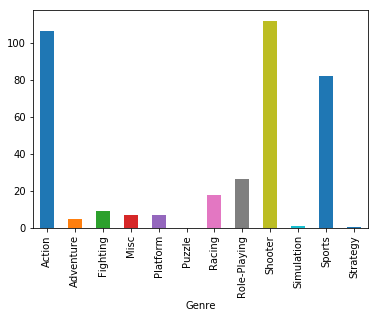

In [44]:
df.groupby('Genre')['Global_Sales'].sum().plot(kind = 'bar')

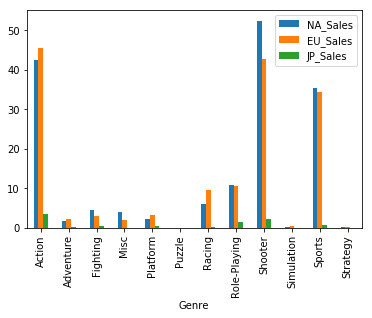

In [45]:
df.groupby('Genre')[['NA_Sales', 'EU_Sales','JP_Sales']].sum().plot(kind = 'bar')

***Answer :***

As we can see the top 3 genres, _Action, Shooters,_ and _Sports_ make up by far, the largest sales by genre. Now when we break it down by continent, we can see that North America values shooters above any other, meanwhile for pure action the EU is slightly above. For Sports we see that they are practically evenly matched, while EU takes the majority for racing and EU and NA are again, tied for Role-Playing.

### Q2: Which Platform is being used by the most by the users, PS4 or Xbox?

In [46]:
df.groupby(['Platform','Year_of_Release']).mean()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Platform Year_of_Release                                              
PS4      2013.0           0.644667  0.716667  0.062667     0.247333   
         2014.0           0.545098  0.747647  0.040196     0.250588   
         2015.0           0.351728  0.435185  0.046914     0.153951   
         2016.0           0.197826  0.300543  0.027174     0.095761   
XOne     2013.0           0.665714  0.300000  0.001429     0.098571   
         2014.0           0.625581  0.367674  0.003023     0.096977   
         2015.0           0.569149  0.283617  0.002766     0.086170   
         2016.0           0.229273  0.157818  0.000182     0.036182   

                          Global_Sales  Critic_Score  Critic_Count  \
Platform Year_of_Release                                             
PS4      2013.0               1.670667     70.933333     30.000000   
         2014.0               1.582941     73.647059     45.117647   
         2015.0               0.989012     72.493827     40.382716   
         2016.0               0.620978     72.565217     38.260870   
XOne     2013.0               1.064286     68.142857     26.785714   
         2014.0               1.094651     74.279070     27.139535   
         2015.0               0.941277     74.617021     25.170213   
         2016.0               0.424727     73.963636     23.527273   

                          User_Score  User_Count  Platform_cat  Genre_cat  \
Platform Year_of_Release                                                    
PS4      2013.0             5.460000  686.066667           0.0   6.400000   
         2014.0             6.792157  739.509804           0.0   5.000000   
         2015.0             6.798765  616.555556           0.0   4.012346   
         2016.0             6.866304  373.043478           0.0   4.293478   
XOne     2013.0             5.650000  417.785714           1.0   6.214286   
         2014.0             6.697674  405.744186           1.0   5.372093   
         2015.0             6.421277  387.000000           1.0   4.617021   
         2016.0             6.609091  165.872727           1.0   4.581818   

                          Rating_cat  
Platform Year_of_Release              
PS4      2013.0             0.933333  
         2014.0             1.607843  
         2015.0             1.950617  
         2016.0             1.793478  
XOne     2013.0             0.928571  
         2014.0             1.558140  
         2015.0             1.702128  
         2016.0             1.654545

***Answer :***

Here we can see that for the ps4 on it's release year, global_sales were at its max, with the following year only seeing a slight decline. For Xbox the opposite is true, with Xbox seeing a slight increase globally on it's second year. Overall PS4 outshines the xbox globally which can be seen in the following bar chart.

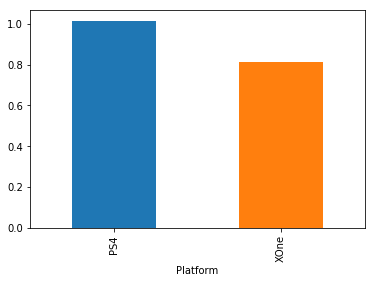

In [47]:
df.groupby(['Platform'])['Global_Sales'].mean().plot(kind = 'bar')

### Q3: Looking at the correlation of features with overall sales

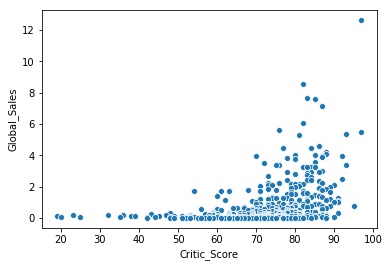

In [48]:
sns.scatterplot(df['Critic_Score'], df['Global_Sales'])

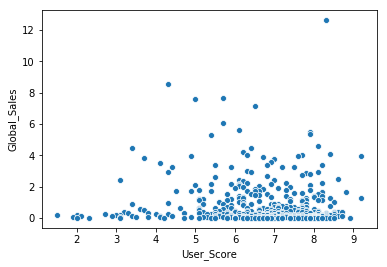

In [49]:
sns.scatterplot(df['User_Score'], df['Global_Sales'])

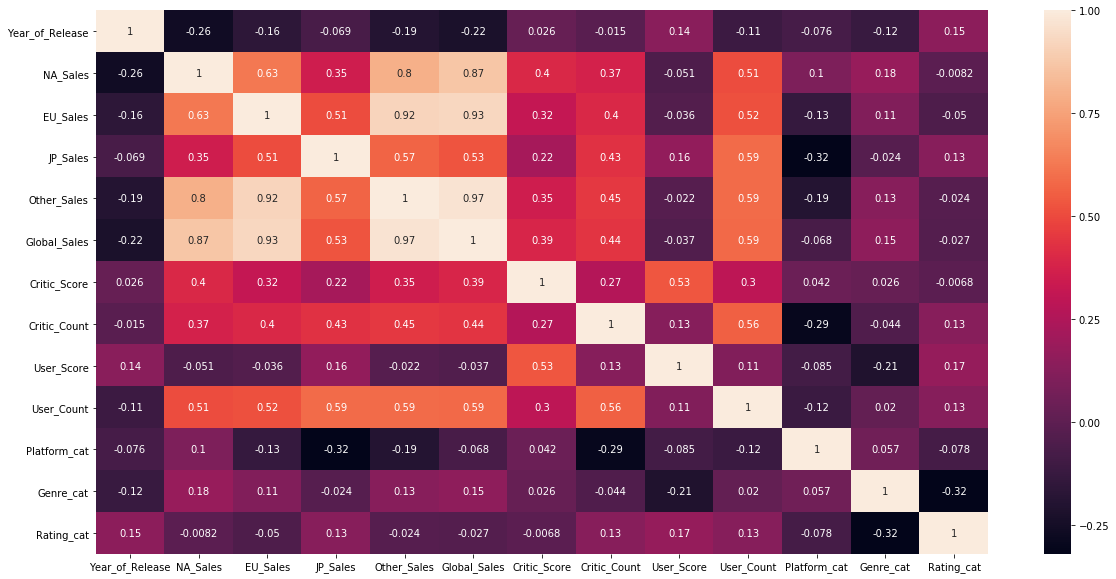

In [50]:
plt.figure(figsize = [20,10])
sns.heatmap(df.corr(), annot = True)

***Answer :***

Looking above we can see that critic score and global_sales have a positive correlation. User_count, Critic_Count, Critic_Score all seemed to have the highest positive correlations with Global_Sales, with Genre also having a relatively high positive correlation. Check out below for more :

In [51]:
df.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating', 'Platform_cat',
       'Genre_cat', 'Rating_cat'],
      dtype='object')

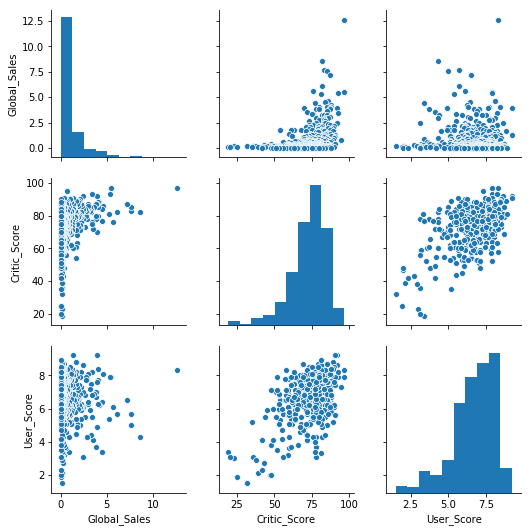

In [52]:
sns.pairplot(df, vars = ['Global_Sales', 'Critic_Score', 'User_Score'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 42 to 16634
Data columns (total 16 columns):
Platform           398 non-null category
Year_of_Release    398 non-null float64
Genre              398 non-null category
NA_Sales           398 non-null float64
EU_Sales           398 non-null float64
JP_Sales           398 non-null float64
Other_Sales        398 non-null float64
Global_Sales       398 non-null float64
Critic_Score       398 non-null float64
Critic_Count       398 non-null float64
User_Score         398 non-null float64
User_Count         398 non-null float64
Rating             398 non-null category
Platform_cat       398 non-null int8
Genre_cat          398 non-null int8
Rating_cat         398 non-null int8
dtypes: category(3), float64(10), int8(3)
memory usage: 57.2 KB


### Q4: Can we predict sales with these attributes?

In [54]:
y = df['Global_Sales']
X = df.drop(['Global_Sales', 'Rating', 'Platform', 'Genre'], axis = 1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state = 42)

In [56]:
X_predict = RandomForestRegressor(n_estimators = 500)
X_predict.fit(X_train, y_train)
y_test_pred = X_predict.predict(X_test)
print(r2_score(y_test, y_test_pred))
print(mean_squared_error(y_test,y_test_pred))

0.8788302263203007
0.3932538044499997


In [57]:
coefs_df = pd.DataFrame()
coefs_df['Features'] = X_train.columns
coefs_df['Coefs'] = X_predict.feature_importances_
coefs_df.sort_values('Coefs', ascending = False).head(10)


,Features,Coefs
4,Other_Sales,0.736083
2,EU_Sales,0.178788
1,NA_Sales,0.066581
9,Platform_cat,0.003328
6,Critic_Count,0.002747
8,User_Count,0.002640
7,User_Score,0.002470
3,JP_Sales,0.002097
5,Critic_Score,0.001774
11,Rating_cat,0.001635


***Answer :***

So, we can obviously assume that outside sales would correlate with global sales as a whole, but I think the interesting aspect is that neither Europe nor North America make up the biggest parts of overall sales, but rather most likely places like Australia, Asia, South America, etc.